In [122]:
import pandas as pd
import hvplot.pandas
from cadCAD.configuration.utils import config_sim
from cadCAD.configuration import Experiment

<span style="display:block;text-align:center;margin-right:105px"><img src="../../media/logos/logo-vertical.png" width="200"/></span>

<h1 style="color:#edc10c">Spirit Foundation: Advanced Simulation Methods</h1>

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">Just put a playlist together to get builders synced and up to date with Spirit Foundation development: <a href="https://t.co/TTZNOByu61">https://t.co/TTZNOByu61</a><a href="https://twitter.com/IndigenCrypto?ref_src=twsrc%5Etfw">@IndigenCrypto</a><br> <a href="https://twitter.com/anielski?ref_src=twsrc%5Etfw">@anielski</a><br> <a href="https://twitter.com/Hesquiaht?ref_src=twsrc%5Etfw">@Hesquiaht</a><br> <a href="https://twitter.com/LongTailFinTech?ref_src=twsrc%5Etfw">@LongTailFinTech</a><br> <a href="https://twitter.com/tecmns?ref_src=twsrc%5Etfw">@tecmns</a><br> <a href="https://twitter.com/SpiritArmy5?ref_src=twsrc%5Etfw">@SpiritArmy5</a><br> <br>We need help! Join the discord!</p>&mdash; YGG ⟠ linuxiscool.eth (@ygg_anderson) <a href="https://twitter.com/ygg_anderson/status/1348045821703376896?ref_src=twsrc%5Etfw">January 9, 2021</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script> 

---

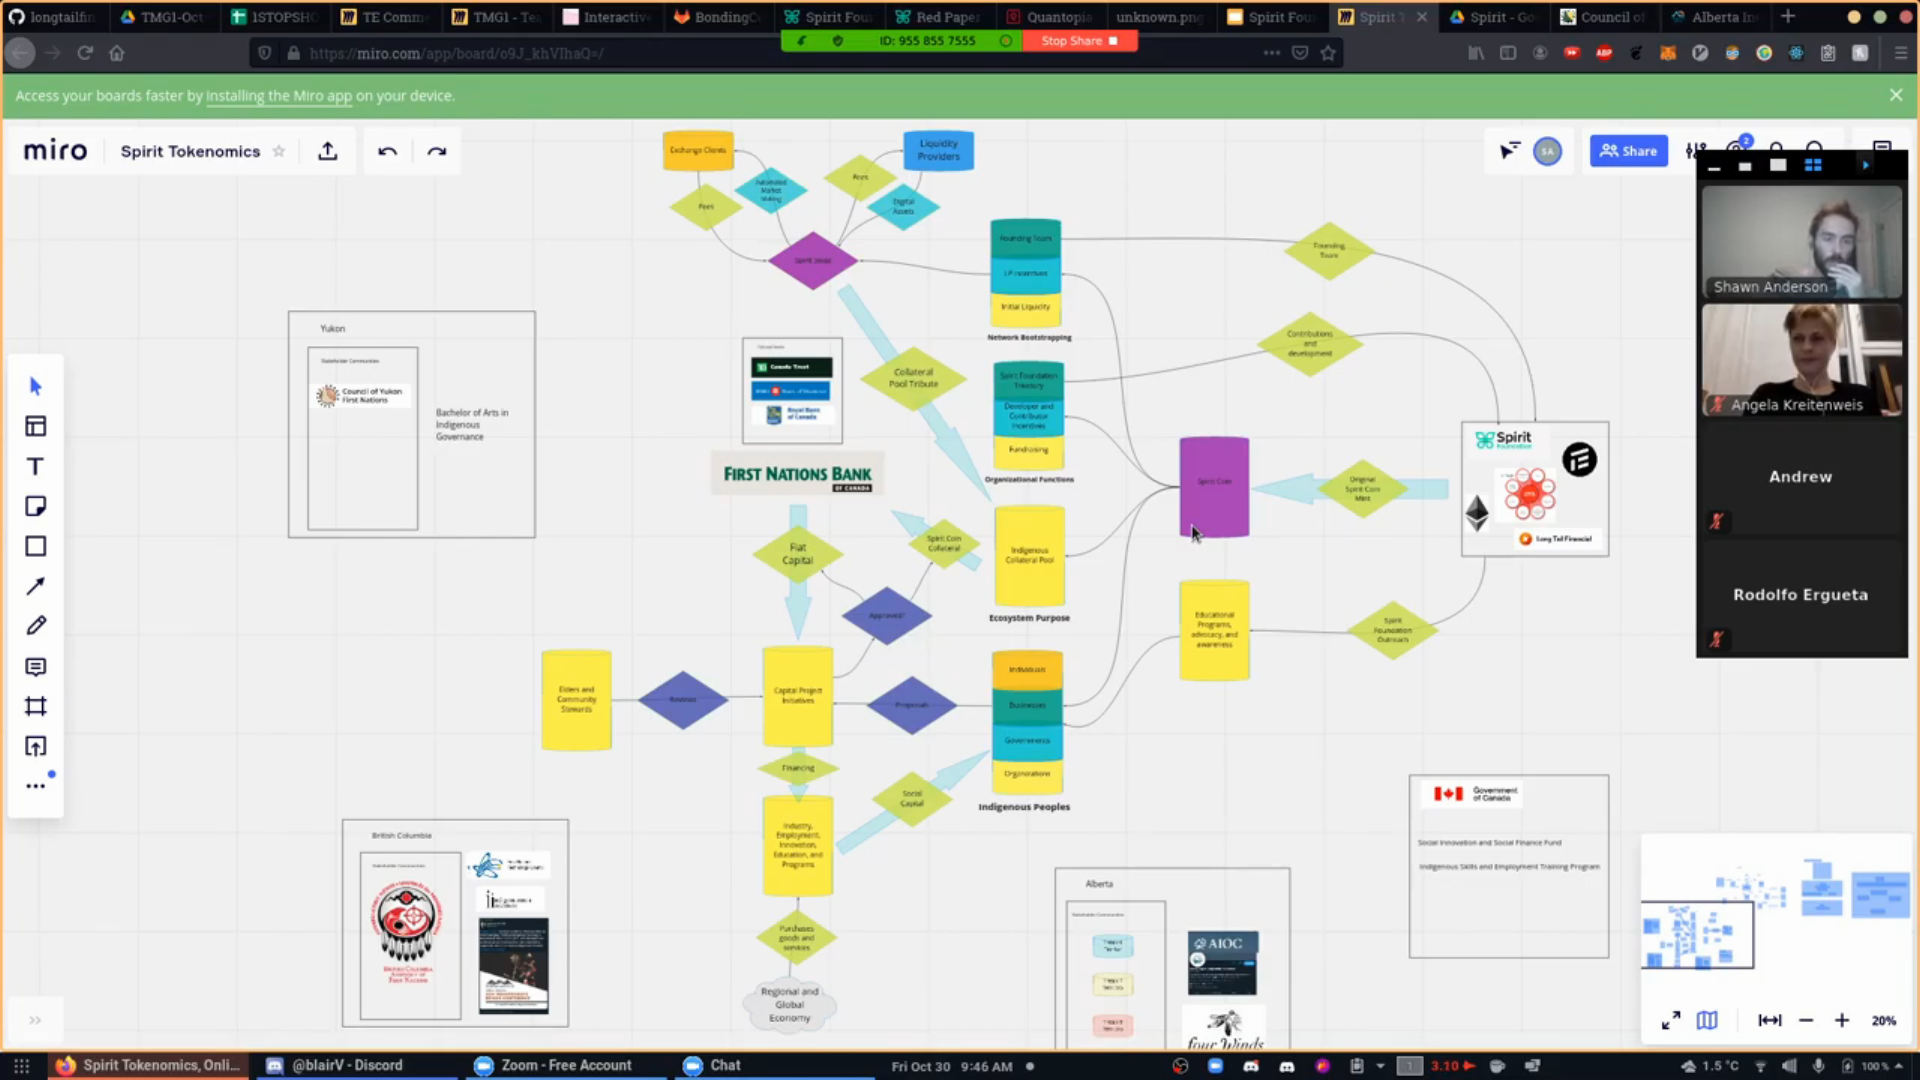

Figure 1: Initial Stock and Flow Diagram

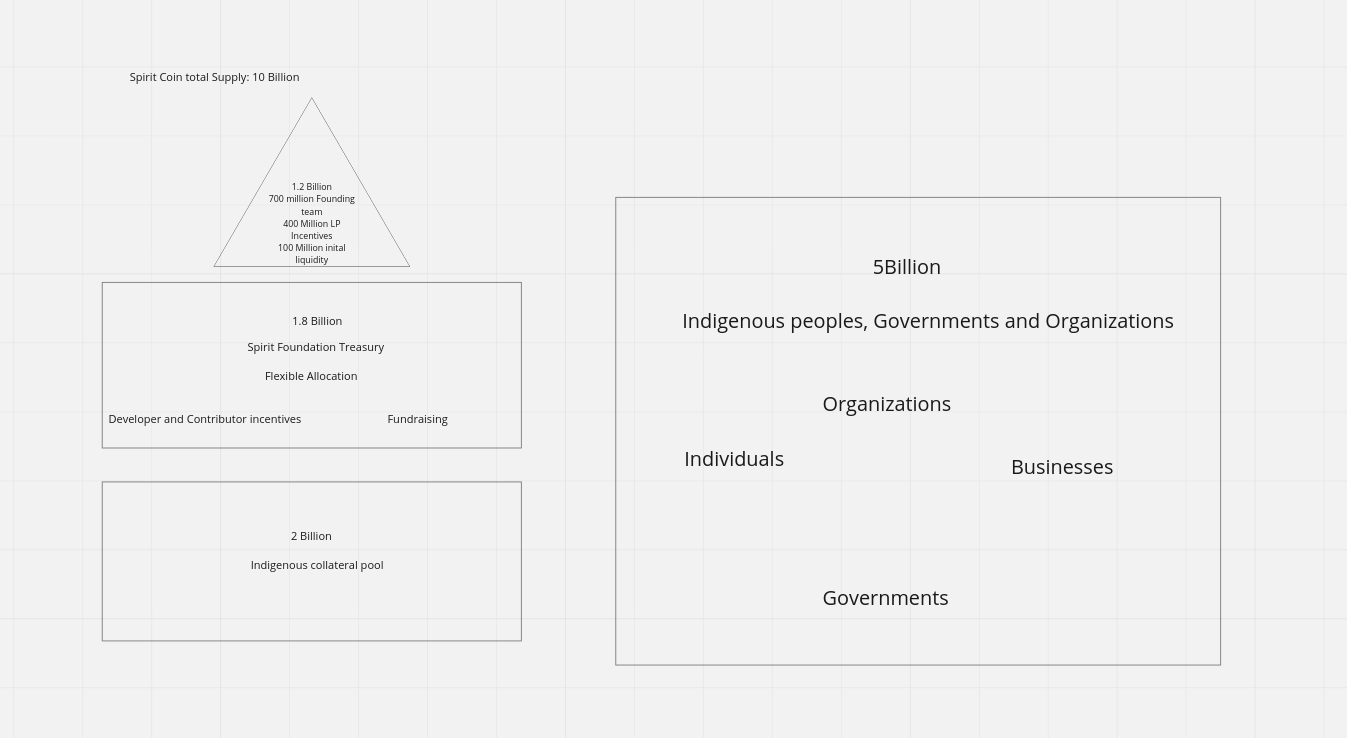

Figure 2: Spirit Coin initialization parameters

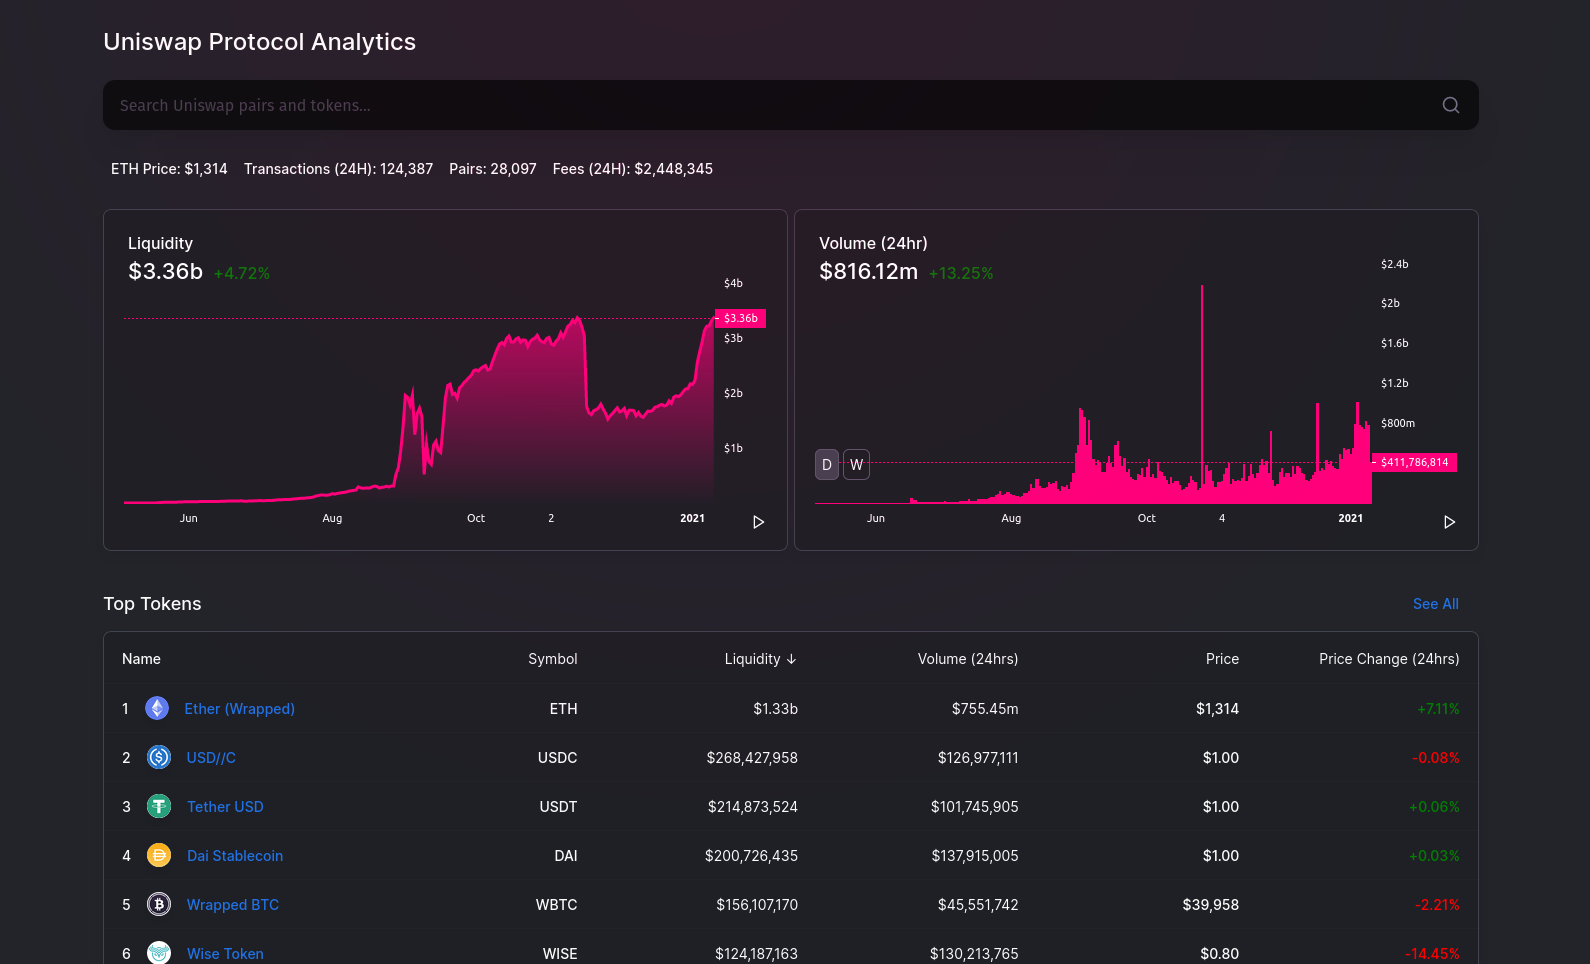

Figure 3: Uniswap Liquidity and Volume stats as of Jan 10th 2021.

## Spirit Coin Distribution

In [129]:
# System Constants
SPIRIT_COIN = 1
INITIAL_PRICE = 0.001
MILLION = 1e6
BILLION = 1e9
STEPS_PER_WEEK = 7 # One step equals one day

In [130]:
# Derived Constants
CAD = SPIRIT_COIN / INITIAL_PRICE
THREE_YEARS = 3 * 52 * STEPS_PER_WEEK

In [131]:
# Spirit Coin Initialization Parameters as per Figure 2

spirit_coin_total_supply = 10 * BILLION * SPIRIT_COIN

# Triangle
founding_team = 700 * MILLION * SPIRIT_COIN
lp_incentives = 400 * MILLION * SPIRIT_COIN
initial_liquidity = 100 * MILLION * SPIRIT_COIN
network_bootstrap = founding_team + lp_incentives + initial_liquidity

# Middle
spirit_foundation_treasury = 1.8 * BILLION * SPIRIT_COIN

# Base
indigenous_collateral_pool = 2 * BILLION * SPIRIT_COIN

# Square
indigenous_stakeholders_total = 5 * BILLION * SPIRIT_COIN
organization_stakeholders = 0.25
individual_stakeholders = 0.25
business_stakeholders = 0.25
government_stakeholders = 0.25


calculated_total_supply = network_bootstrap + spirit_foundation_treasury + indigenous_collateral_pool + indigenous_stakeholders_total
try:
    assert(spirit_coin_total_supply == calculated_total_supply)
    print(f"Total Supply Passes Checks, {calculated_total_supply / BILLION} Billion Spirit Coin Allocated.")
except AssertionError:
    print("Total Supply Doesn't Add Up.")
    print(spirit_coin_total_supply, calculated_total_supply)
    

Total Supply Passes Checks, 10.0 Billion Spirit Coin Allocated.


<AxesSubplot:ylabel='Amount'>

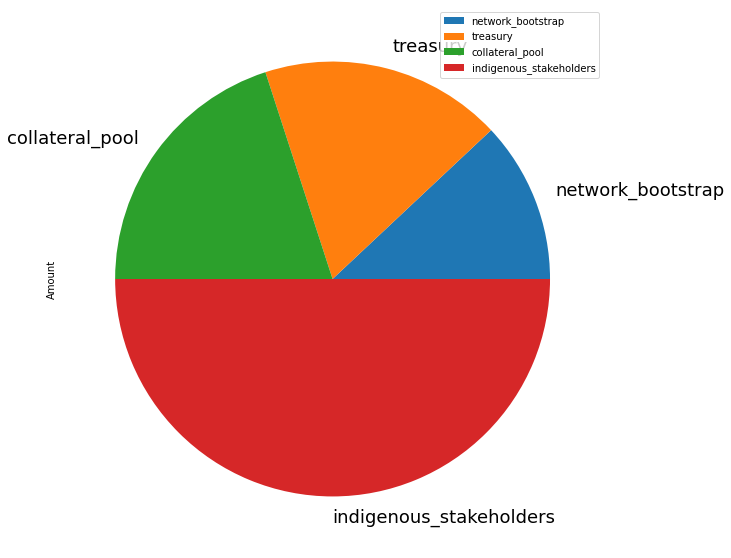

In [132]:
token_supply = {
    'network_bootstrap': network_bootstrap,
    'treasury': spirit_foundation_treasury,
    'collateral_pool': indigenous_collateral_pool,
    'indigenous_stakeholders': indigenous_stakeholders_total,
}

# Visualize the distribution
ts = pd.DataFrame(token_supply.items(), columns=['Allocation', 'Amount'])
ts['Amount'] = ts['Amount'].astype(float)
ts.set_index('Allocation').plot.pie(y='Amount',figsize=(10, 10), fontsize=18)

In [135]:
ts

,Allocation,Amount
0,network_bootstrap,1.200000e+09
1,treasury,1.800000e+09
2,collateral_pool,2.000000e+09
3,indigenous_stakeholders,5.000000e+09


## Stake Holder Initialization

In [138]:
stake_holders = {
    'communities_onboarded': 3,
    'number_of_liquidity_providers': 10,
    'number_of_speculators': 30,
    'compensated_developers': 3,
    'volunteer_developers': 3,
}
spirit_coin = {
    'initial_supply': 18000000
}

# Modelling the Ecosystem

## Exercise 1: Monte Carlo Method

Given the following simulation configuration, **how many runs would you expect cadCAD to create?**

Imports

Launch Parameters

System Assumptions

In [54]:
system_params = {
    'liquidity_provider_distribution': [(1500, 500)],
    'initial_investment': [100000 * CAD],
    'pay_per_developer_per_step': [1500 * CAD / WEEK],
}

Policy Functions

In [56]:
# Fill in function arguments
def p_example_1(params, substep, state_history, previous_state):
    # Fill in return value
    return {'example_signal': 1}

# Fill in function arguments
def p_example_2(params, substep, state_history, previous_state):
    # Fill in return value
    return {'example_signal': 1}

# Fill in function arguments
def s_example_1(params, substep, state_history, previous_state, policy_input):
    # Hint: take the differential spec. diagram as the source of truth, and correct the function

    # Fill in return value
    return {'state_1': 1}

# Fill in function arguments
def s_example_2(params, substep, state_history, previous_state, policy_input):
    # Fill in policy signal key
    new_state = policy_input['example_signal']
    # Fill in return value
    return 'state_2', new_state

In [55]:
MONTE_CARLO_RUNS = 10

sim_config = config_sim({
    'N': MONTE_CARLO_RUNS,
    'T': range(THREE_YEARS),
    'M': system_params
})

**Answer:**

10

In [ ]:
def p_example(params, substep, state_history, previous_state):
    return {'example_signal': 1}
    
def s_example(params, substep, state_history, previous_state, policy_input):
    example_signal = policy_input['example_signal']
    return 'example_state', example_signal

partial_state_update_blocks = [
    {
        'policies': {
            'example_policy': p_example
        },
        'variables': {
            'example_state': s_example
        }
    }
]

In [45]:
experiment = Experiment()

experiment.append_configs(
    initial_state = initial_state,
    partial_state_update_blocks = partial_state_update_blocks,
    sim_configs = sim_config,
)

NameError: name 'partial_state_update_blocks' is not defined

100

## Exercise 2: Parameter Sweeps

Given the following two parameter lists, configure a parameter sweep for all possible combinations of the two parameters.

```python
parameter_1 = [1, 2]
parameter_2 = [0, 10, 20, 30]
```

In [ ]:
# The following statement is incomplete - fill in the gaps and run the cell

system_params = {
    '': [],
    '': []
}
system_params

## Exercise 3: A/B Testing

Given the following function (a failure rate calculation for a manufacturing process), and the two models `a` and `b`, fill in the gaps and run an A/B test.

In [ ]:
import pandas as pd
import plotly
import plotly.express as px

pd.options.plotting.backend = "plotly"

from cadCAD.configuration.utils import config_sim
from cadCAD.engine import ExecutionMode, ExecutionContext
from cadCAD.engine import Executor
from cadCAD.configuration import Experiment

In [ ]:
# Run this cell: failure rate calculation

def failure_rate(speed, limit=100, alpha=0):
    # If the speed is greater than the limit, return a 100% failure rate
    if speed >= limit:
        return 1
    # Else if the speed is less than 1, return a 0% failure rate to bound the system
    elif speed <= 1:
        return 0
    # Else calculate a sigmoid like function of the failure rate
    else:
        return 2 * limit / (2 * limit + (speed / (2 * limit - speed))**(-alpha))

In [ ]:
# Run this cell: model A initial state and parameterization

initial_state_a = {
    'failure_rate': 0
}

alpha_start = 0
alpha_end = 5

system_params_a = {
    'alpha': list(range(alpha_start, alpha_end + 1)),
    'limit': [100]
}

In [ ]:
# Run this cell: model B initial state and parameterization

initial_state_b = {
    'failure_rate': 0
}

alpha_start = 5
alpha_end = 10

system_params_b = {
    'alpha': list(range(alpha_start, alpha_end + 1)),
    'limit': [100]
}

In [ ]:
# Run this cell: shared policy and state update functions

def p_assembly_process(params, substep, state_history, previous_state):
    speed = previous_state['timestep']
    limit = params['limit']
    alpha = params['alpha']
    
    delta_failure_rate = failure_rate(speed, limit, alpha)
    return {'delta_failure_rate': delta_failure_rate}
    
def s_failure_rate(params, substep, state_history, previous_state, policy_input):
    delta_failure_rate = policy_input['delta_failure_rate']
    return 'failure_rate', delta_failure_rate

In [ ]:
# Run this cell: shared partial state update blocks

partial_state_update_blocks = [
    {
        'policies': {
            'manufacture': p_assembly_process
        },
        'variables': {
            'failure_rate': s_failure_rate
        }
    }
]

In [ ]:
# Run this cell: shared configuration

SIMULATION_TIMESTEPS = 100
MONTE_CARLO_RUNS = 1

experiment = Experiment()

from cadCAD import configs
del configs[:] # Clear any prior configs

Update the following two cells:

In [ ]:
# The following statements are incomplete - fill in the gaps and run the cell

# Model A simulation configuration
sim_config = config_sim({})

experiment.append_configs()

In [ ]:
# The following statements are incomplete - fill in the gaps and run the cell

# Model B simulation configuration
sim_config = config_sim({})

experiment.append_configs()

In [ ]:
# Run this cell

exec_context = ExecutionContext()
simulation = Executor(exec_context=exec_context, configs=configs)
raw_result, tensor_field, sessions = simulation.execute()
simulation_result = pd.DataFrame(raw_result)

In [ ]:
# Run this cell

fig = px.line(
    simulation_result,
    x='timestep',
    y=['failure_rate'],
    facet_row='simulation',
    facet_col='run',
    height=800,
    template='seaborn',
)

fig.show()

<br/><br/><br/>
# Well done!
<br/><br/><br/><br/>